Étape 1 : Charger les données

In [1]:
import pandas as pd

df = pd.read_csv('../dataset/telecom_churn.csv')
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


Étape 2 : Exploration des données (EDA)


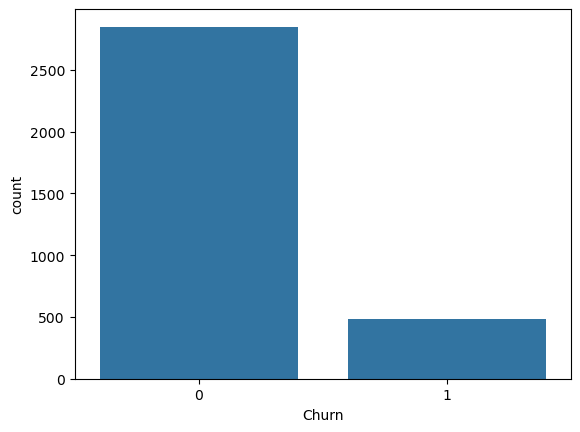

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Churn', data=df)
plt.show()

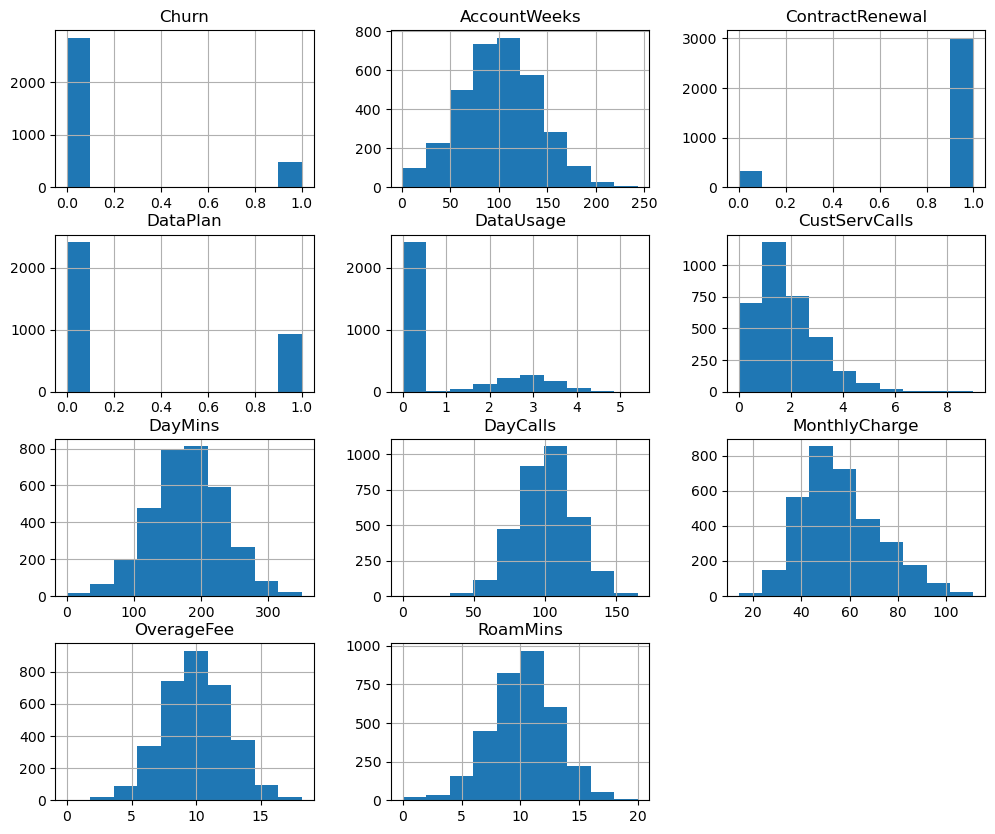

In [3]:
df.hist(figsize=(12,10))
plt.show()

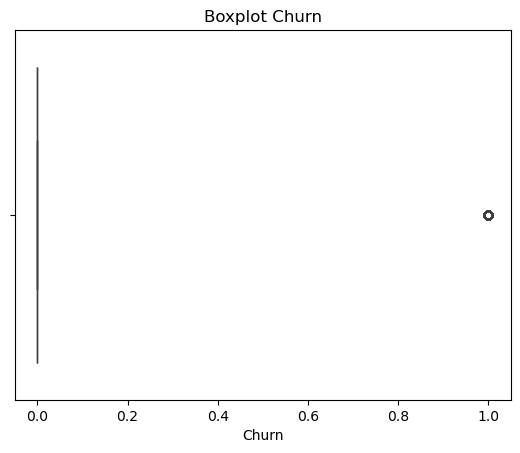

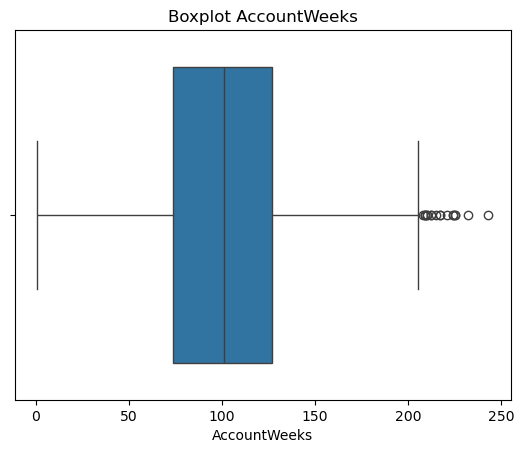

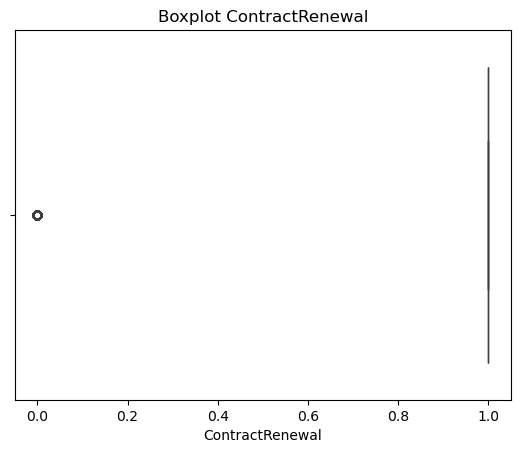

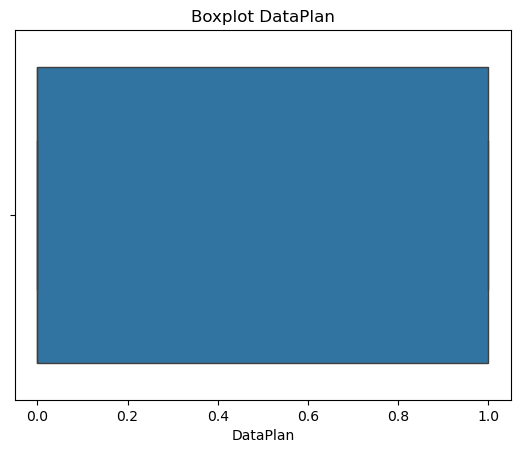

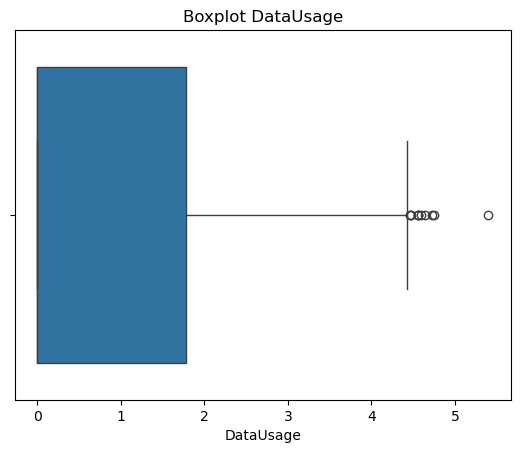

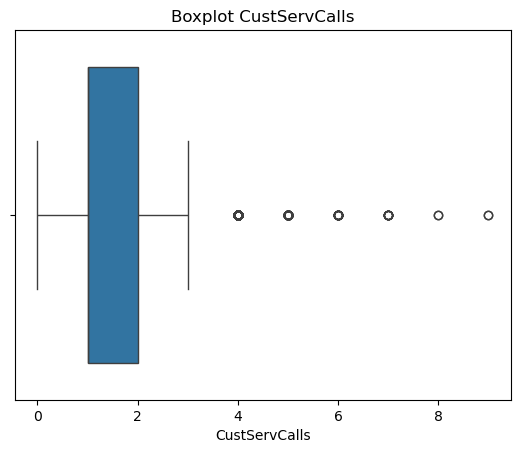

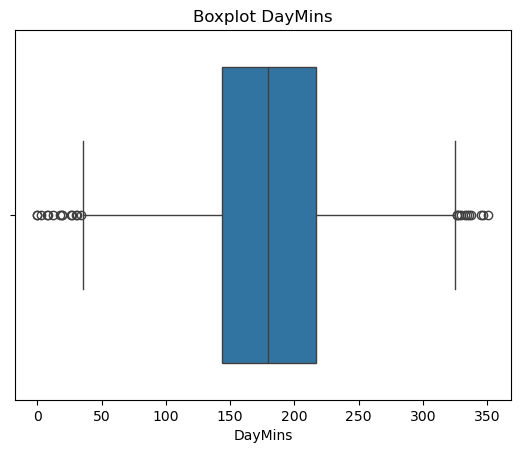

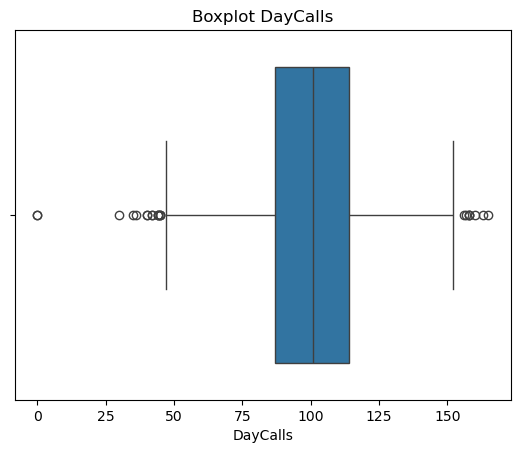

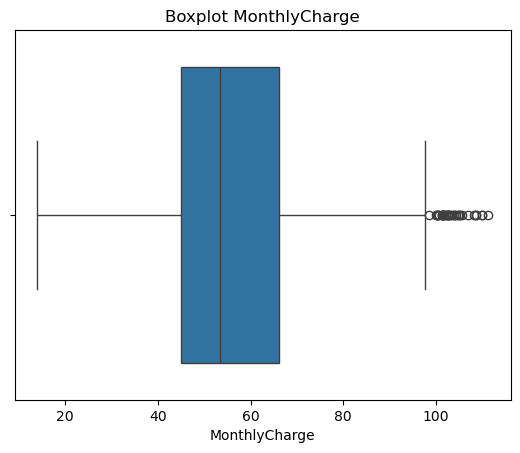

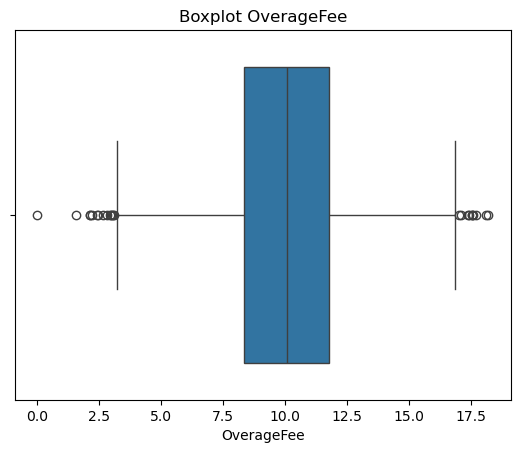

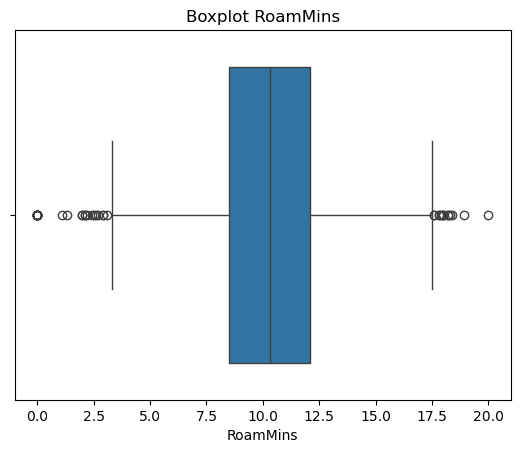

In [4]:
numeric_cols = df.select_dtypes(include=['int64','float64']).columns
for col in numeric_cols:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot {col}')
    plt.show()

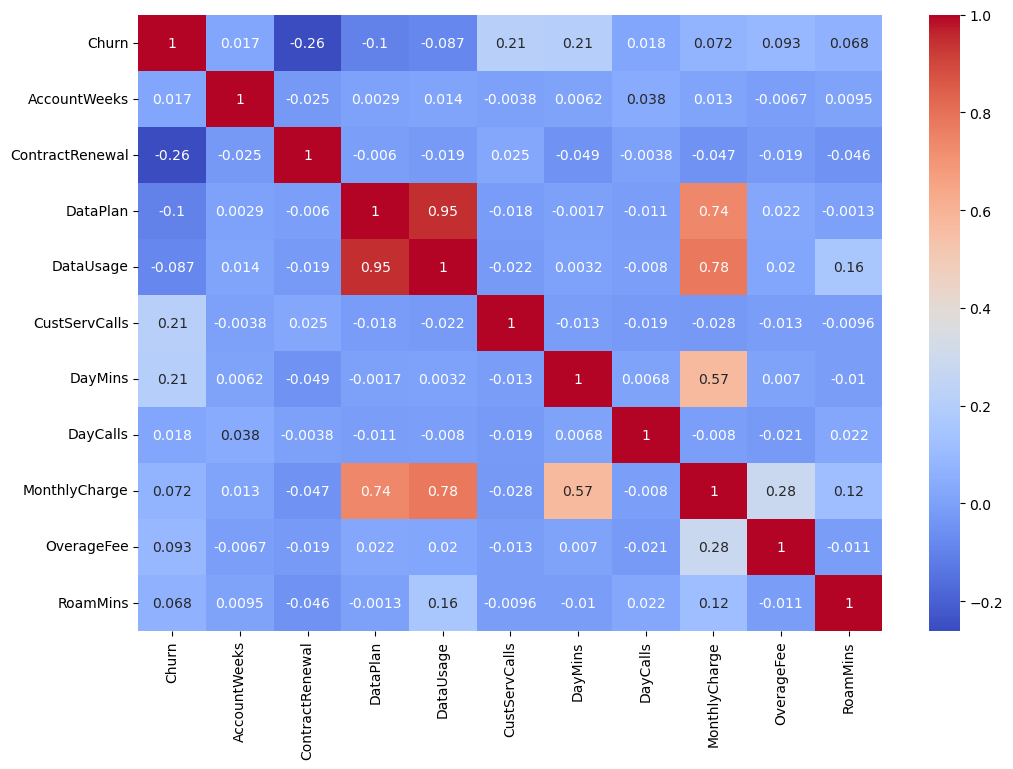

In [5]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

Étape 3 : Data Cleaning

In [6]:
# Supprimer valeurs nulles
df = df.dropna()

# Encoder variables catégorielles
df = pd.get_dummies(df, drop_first=True)

# Normalisation si nécessaire
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numeric_cols = df.select_dtypes(include=['int64','float64']).columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

Étape 4 : Séparer les données

In [10]:
from sklearn.model_selection import train_test_split

# Utilise directement 'Churn' comme target
X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # garde la proportion des classes
)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)

Train size: (2666, 10)
Test size: (667, 10)


Étape 5 : Entraîner 3 modèles de classification

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Régression Logistique
lr = LogisticRegression(max_iter=1000, class_weight='balanced')
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Random Forest
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

Étape 6 : Comparer les modèles

--- Logistic Regression ---
Accuracy : 0.760119940029985
              precision    recall  f1-score   support

         0.0       0.95      0.76      0.84       570
         1.0       0.35      0.74      0.47        97

    accuracy                           0.76       667
   macro avg       0.65      0.75      0.66       667
weighted avg       0.86      0.76      0.79       667



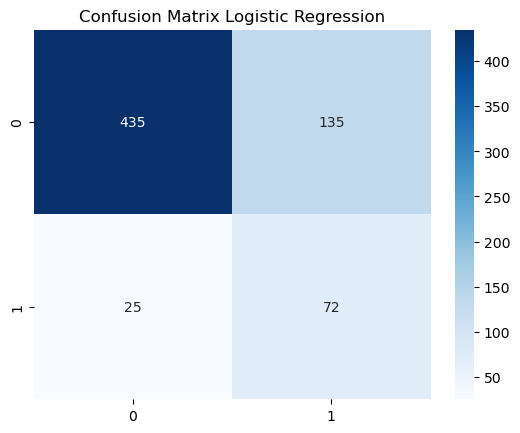

--- Decision Tree ---
Accuracy : 0.8920539730134932
              precision    recall  f1-score   support

         0.0       0.93      0.94      0.94       570
         1.0       0.64      0.59      0.61        97

    accuracy                           0.89       667
   macro avg       0.79      0.77      0.78       667
weighted avg       0.89      0.89      0.89       667



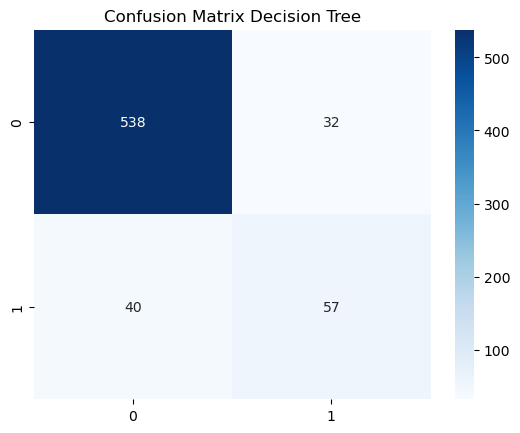

--- Random Forest ---
Accuracy : 0.9250374812593704
              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96       570
         1.0       0.82      0.62      0.71        97

    accuracy                           0.93       667
   macro avg       0.88      0.80      0.83       667
weighted avg       0.92      0.93      0.92       667



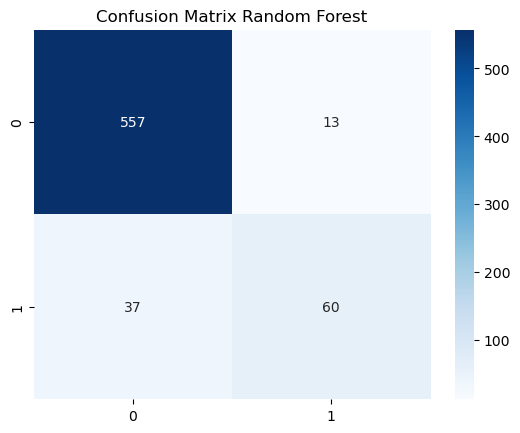

In [12]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

models = {'Logistic Regression': y_pred_lr,
          'Decision Tree': y_pred_dt,
          'Random Forest': y_pred_rf}

for name, y_pred in models.items():
    print(f"--- {name} ---")
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix {name}')
    plt.show()

Étape 7 : Interprétation

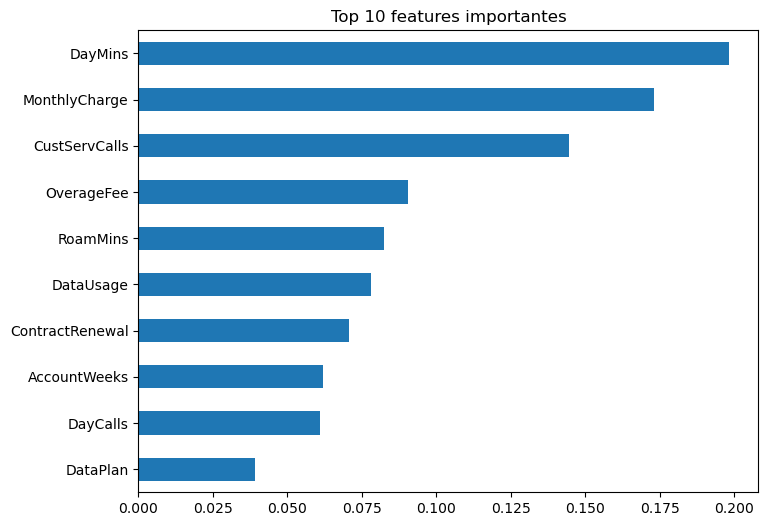

In [13]:
# Importance des features (exemple Random Forest)
import pandas as pd

importances = rf.feature_importances_
feat_importances = pd.Series(importances, index=X.columns)
feat_importances.sort_values(ascending=True).plot(kind='barh', figsize=(8,6))
plt.title("Top 10 features importantes")
plt.show()